In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math
import random
import time
import datetime
import operator
%matplotlib inline

In [27]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [28]:
cols = deaths_reported.keys()

In [57]:
deaths_cases = deaths_reported.loc[:,:cols[-37]]
deaths_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1164,1181,1185,1186,1190,1211,1225,1248,1259,1269
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,111,112,113,117,120,123,128,134,138,144
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1068,1078,1087,1100,1111,1124,1136,1146,1155,1163
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,29,29,29,30,33,33,35,39,40,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,59,62,63,64,66,67,70,75,76,78
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,443,445,447,456,458,461,469,474,479,483
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,120,120,128,128,128,134,136,139,139,140


In [54]:
confirmed_cases_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [55]:
confirmed_cases = confirmed_cases_reported.loc[:,:cols[-37]]
confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,880,880,884,884,889,889,897,897,897,907
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,687,705,749,779,812,851,880,916,932,950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,8204,8549,8916,9228,9398,9744,10093,10306,10469,10621
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1581,1606,1619,1629,1640,1654,1674,1674,1681,1691
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,2980,2980,3326,3386,3583,3789,3856,4328,4481,4552


In [46]:
recovered_cases_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [56]:
recovered_cases = recovered_cases_reported.loc[:,:cols[-37]]
recovered_cases 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,23273,23634,23741,23741,23924,24550,24602,24793,25180,25198
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2264,2311,2352,2397,2463,2523,2608,2637,2682,2745
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,15744,16051,16400,16646,16983,17369,17369,18076,18088,18837
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,803,803,803,803,803,803,803,803,803,803
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,210,221,221,221,221,236,241,242,242,242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,1596,1921,1921,1932,1950,2720,2720,3282,3752,3752
249,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
250,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,701,712,714,741,751,762,779,780,797,833
251,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,1462,1462,1620,1620,1677,1677,1677,1953,2350,2815


In [48]:
overview = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-15-2020.csv')

In [49]:
overview.head()


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-16 04:44:59,34.223334,-82.461707,165,1,0,164.0,"Abbeville, South Carolina, US",672.728014,0.606061
1,22001.0,Acadia,Louisiana,US,2020-07-16 04:44:59,30.295065,-92.414197,1510,46,0,1464.0,"Acadia, Louisiana, US",2433.717463,3.046358
2,51001.0,Accomack,Virginia,US,2020-07-16 04:44:59,37.767072,-75.632346,1045,14,0,1031.0,"Accomack, Virginia, US",3233.692289,1.339713
3,16001.0,Ada,Idaho,US,2020-07-16 04:44:59,43.452658,-116.241552,4836,28,0,4808.0,"Ada, Idaho, US",1004.179930,0.578991
4,19001.0,Adair,Iowa,US,2020-07-16 04:44:59,41.330756,-94.471059,17,0,0,17.0,"Adair, Iowa, US",237.695749,0.000000


In [50]:
confirmed = confirmed_cases_reported.loc[:, cols[4]:]
deaths = deaths_reported.loc[:, cols[4]:]
recoveries = recovered_cases_reported.loc[:, cols[4]:]

In [51]:
deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,0,0,0,0,0,0,0,0,0,0,...,1164,1181,1185,1186,1190,1211,1225,1248,1259,1269
1,0,0,0,0,0,0,0,0,0,0,...,111,112,113,117,120,123,128,134,138,144
2,0,0,0,0,0,0,0,0,0,0,...,1068,1078,1087,1100,1111,1124,1136,1146,1155,1163
3,0,0,0,0,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,0,0,0,0,0,0,0,0,0,0,...,29,29,29,30,33,33,35,39,40,41


In [38]:
recoveries.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20
0,0,0,0,0,0,0,0,0,0,0,...,23273,23634,23741,23741,23924,24550,24602,24793,25180,25198
1,0,0,0,0,0,0,0,0,0,0,...,2264,2311,2352,2397,2463,2523,2608,2637,2682,2745
2,0,0,0,0,0,0,0,0,0,0,...,15744,16051,16400,16646,16983,17369,17369,18076,18088,18837
3,0,0,0,0,0,0,0,0,0,0,...,803,803,803,803,803,803,803,803,803,803
4,0,0,0,0,0,0,0,0,0,0,...,210,221,221,221,221,236,241,242,242,242


In [263]:
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
world_cases = []
total_deaths = [] 
mortality_rate = []

dates = confirmed.keys()

In [272]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
print(sum(mortality_rate)/len(mortality_rate))
print(sum(recovery_rate)/len(recovery_rate))

0.048670200532909304
0.3502604922843476


In [52]:
china_cases = [] 
italy_cases = []
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = []
india_cases = []
us_cases = [] 
spain_cases = [] 
for i in dates:
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    

In [58]:

china_recoveries = [] 
italy_recoveries = []
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 
india_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
for i in dates:
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())

In [59]:
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
india_deaths = []
china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 

for i in dates:
    china_deaths.append(deaths_reported[deaths_cases['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_cases['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_cases['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_cases['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_cases['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_cases['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_cases['Country/Region']=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_cases['Country/Region']=='India'][i].sum())
  

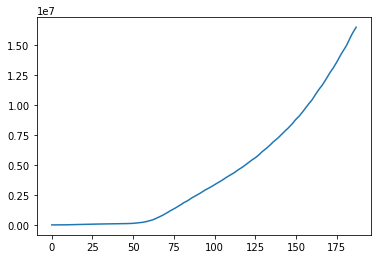

In [60]:
plt.plot(world_cases)
plt.show()

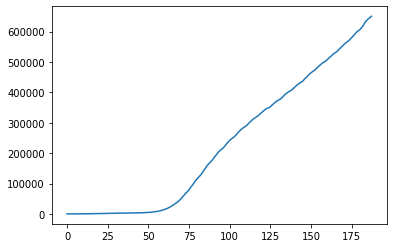

In [61]:
plt.plot(total_deaths)
plt.show()



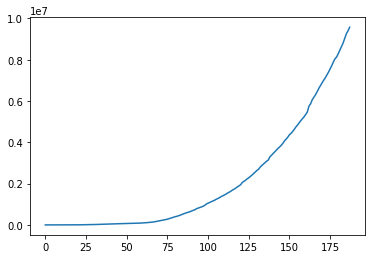

In [62]:
plt.plot(total_recovered)
plt.show()

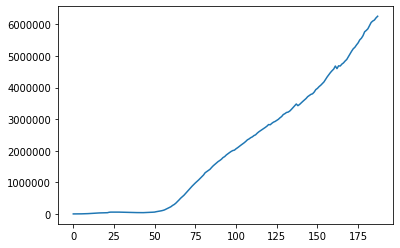

In [63]:
plt.plot(total_active)
plt.show()

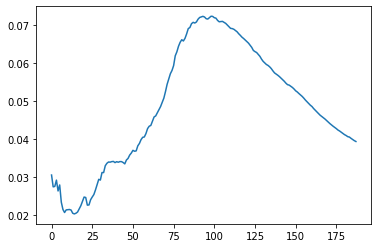

In [64]:
plt.plot(mortality_rate)
plt.show()

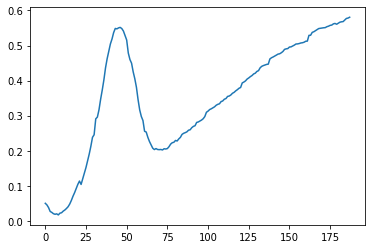

In [65]:
plt.plot(recovery_rate)
plt.show()

In [135]:

x = confirmed_cases[confirmed_cases["Country/Region"]=="India"]
for i in x.iloc[:,4:]:
    if list(x[i])[0]>0:
        print("first case in India",i)
        break

first case in India 1/30/20


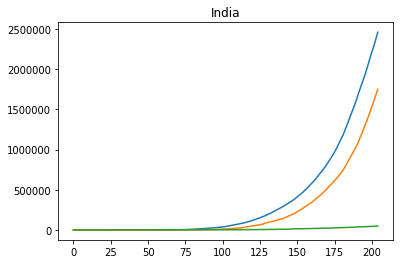

In [67]:
plt.plot(india_cases)
plt.plot(india_recoveries)
plt.plot(india_deaths)
plt.title("India")
plt.show()

In [66]:

india = pd.DataFrame({"dates":pd.Series(dates),"Confirmed cases":pd.Series(india_cases),"Recovered cases":pd.Series(india_recoveries),"Death cases":pd.Series(india_deaths)})
india

,dates,Confirmed cases,Recovered cases,Death cases
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0
...,...,...,...,...
183,7/23/20,1288108,817209,30601
184,7/24/20,1337024,849432,31358
185,7/25/20,1385635,885573,32060
186,7/26/20,1435616,917568,32771


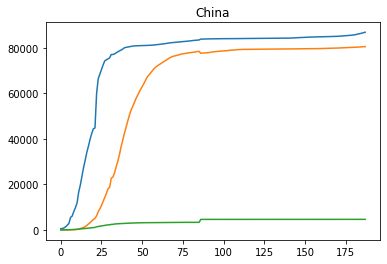

In [67]:
plt.plot(china_cases)
plt.plot(china_recoveries)
plt.plot(china_deaths)
plt.title("China")
plt.show()

In [68]:
china = pd.DataFrame({"dates":pd.Series(dates),"Confirmed cases":pd.Series(china_cases),"Recovered cases":pd.Series(china_recoveries),"Death cases":pd.Series(china_deaths)})
china

,dates,Confirmed cases,Recovered cases,Death cases
0,1/22/20,548,28,17
1,1/23/20,643,30,18
2,1/24/20,920,36,26
3,1/25/20,1406,39,42
4,1/26/20,2075,49,56
...,...,...,...,...
183,7/23/20,86045,80297,4649
184,7/24/20,86202,80341,4650
185,7/25/20,86381,80409,4652
186,7/26/20,86570,80459,4652


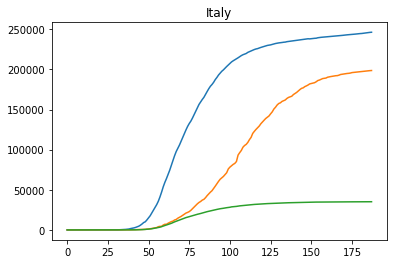

In [69]:
plt.plot(italy_cases)
plt.plot(italy_recoveries)
plt.plot(italy_deaths)
plt.title("Italy")
plt.show()

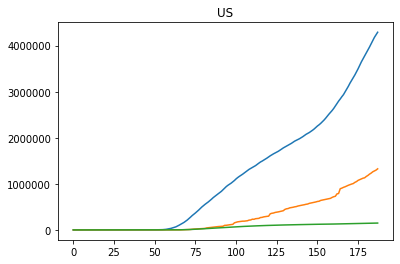

In [70]:
plt.plot(us_cases)
plt.plot(us_recoveries)
plt.plot(us_deaths)
plt.title("US")
plt.show()

In [73]:
unique_countries =  list(latest_data['Country_Region'].unique())

In [74]:
confirmed_by_country = []
death_by_country = [] 
active_by_country = []
recovery_by_country = []
mortality_rate_by_country = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_by_country.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, confirmed_by_country), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    confirmed_by_country[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    death_by_country.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    recovery_by_country.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    active_by_country.append(confirmed_by_country[i] - death_by_country[i] - recovery_by_country[i])
    mortality_rate_by_country.append(death_by_country[i]/confirmed_by_country[i])

In [72]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': confirmed_by_country,
                          'Number of Deaths': death_by_country, 'Number of Recoveries' : recovery_by_country, 
                          'Number of Active Cases' : active_by_country,
                          'Mortality Rate': mortality_rate_by_country})
# number of cases per country/region

country_df.style.background_gradient(cmap='Reds')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,3497847,137407,1075882,2284558,0.039283
1,Brazil,1966748,75366,1350098,541284,0.038320
2,India,968857,24914,612768,331175,0.025715
3,Russia,745197,11753,522375,211069,0.015772
4,Peru,337751,12417,226400,98934,0.036764
5,Chile,321205,7186,292085,21934,0.022372
6,Mexico,317635,36906,252368,28361,0.116190
7,South Africa,311049,4453,160693,145903,0.014316
8,United Kingdom,293469,45138,1386,246945,0.153808
9,Iran,264561,13410,227561,23590,0.050688


In [190]:
unique_provinces =  list(latest_data['Province_State'].unique())

In [191]:
confirmed_by_province = []
country_by_province = [] 
death_by_province = [] 
recovery_by_province = []
mortality_rate_by_province = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        confirmed_by_province.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, confirmed_by_province), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    confirmed_by_province[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    country_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    death_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    recovery_by_province.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    mortality_rate_by_province.append(death_by_province[i]/confirmed_by_province[i])

In [192]:
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Country': country_by_province, 'Number of Confirmed Cases': confirmed_by_province,
                          'Number of Deaths': death_by_province, 'Number of Recoveries' : recovery_by_province,
                          'Mortality Rate': mortality_rate_by_province})
# number of cases per country/region

province_df.style.background_gradient(cmap='Reds')

In [197]:
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(confirmed_by_country[10:])

for i in range(len(confirmed_by_country[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(confirmed_by_country[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)


In [202]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 9))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()


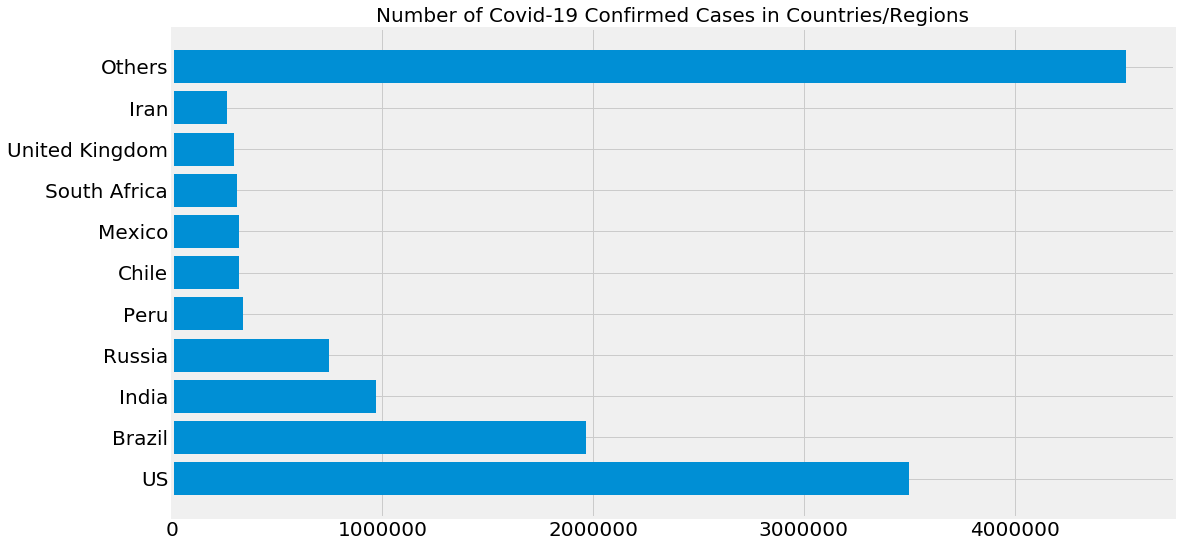

In [99]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, 'Number of Covid-19 Confirmed Cases in Countries/Regions')

In [201]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(12,12))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

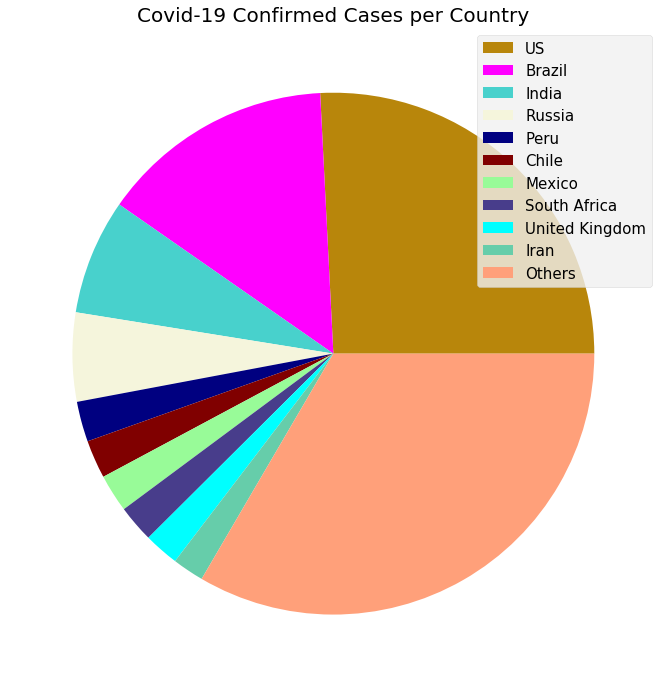

In [199]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

In [210]:
visual_unique_countries = [] 
visual_death_cases = []
others = np.sum(death_by_country[10:])

for i in range(len(confirmed_by_country[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_death_cases.append(death_by_country[i])
    
visual_unique_countries.append('Others')
visual_death_cases.append(others)


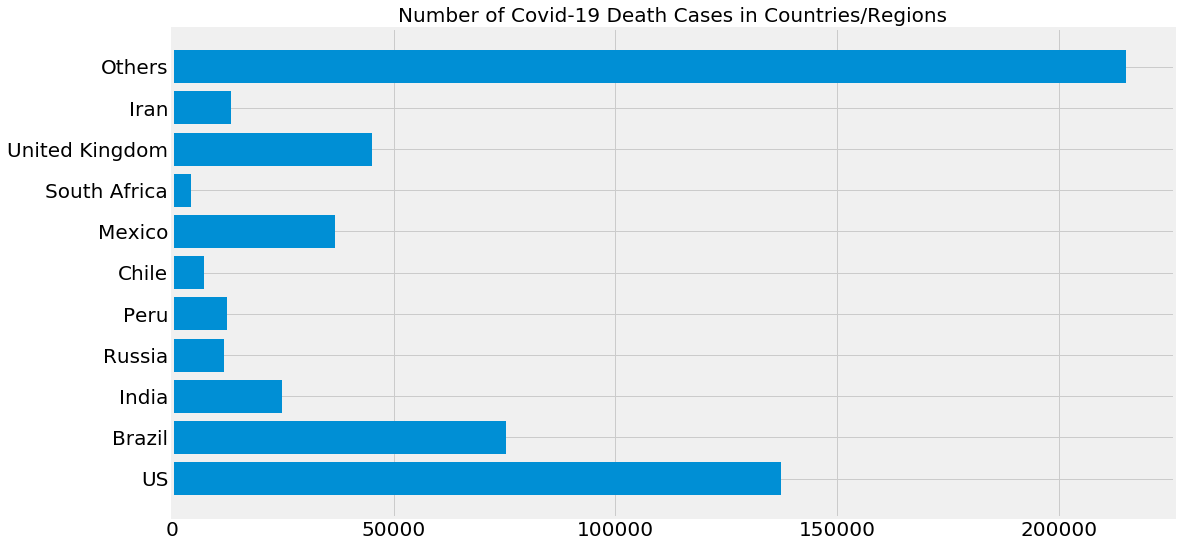

In [203]:
plot_bar_graphs(visual_unique_countries, visual_death_cases, 'Number of Covid-19 Death Cases in Countries/Regions')

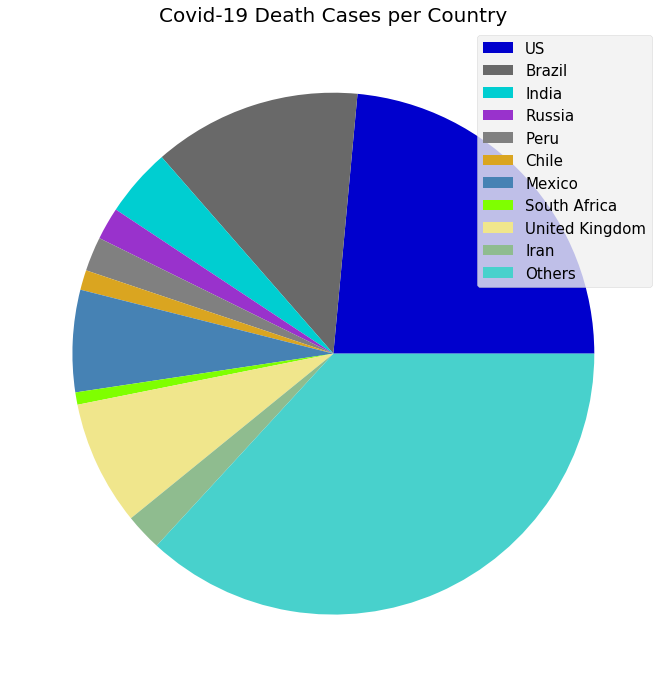

In [204]:
plot_pie_charts(visual_unique_countries, visual_death_cases, 'Covid-19 Death Cases per Country')

In [211]:
visual_unique_countries = [] 
visual_recovery_cases = []
others = np.sum(recovery_by_country[10:])

for i in range(len(confirmed_by_country[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_recovery_cases.append(death_by_country[i])
    
visual_unique_countries.append('Others')
visual_recovery_cases.append(others)

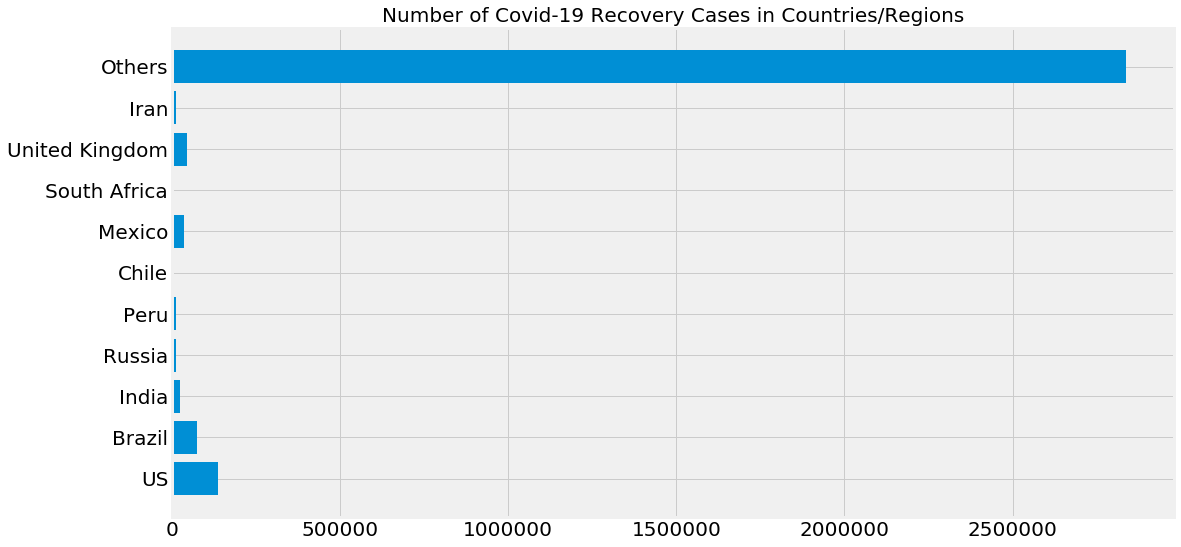

In [212]:
plot_bar_graphs(visual_unique_countries, visual_recovery_cases, 'Number of Covid-19 Recovery Cases in Countries/Regions')

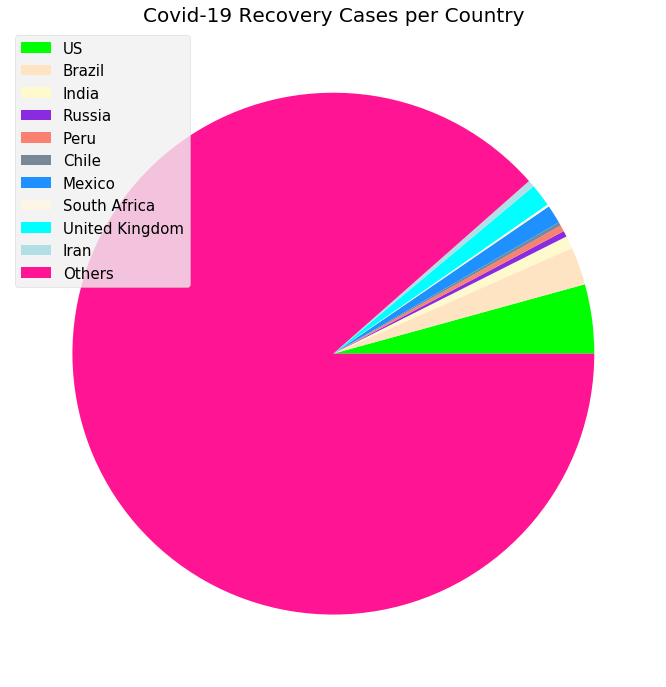

In [214]:
plot_pie_charts(visual_unique_countries, visual_recovery_cases, 'Covid-19 Recovery Cases per Country')

In [102]:
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(confirmed_by_province[10:])

for i in range(len(confirmed_by_province[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(confirmed_by_province[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

In [244]:
India_province = latest_data[latest_data["Country_Region"] == "India"]
India_province = India_province.sort_values(by = "Confirmed",ascending = False)
India_province[:10]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
3397,NaN,NaN,Maharashtra,India,2020-07-16 04:44:59,19.449759,76.108221,275640,10928,152613,112099.0,"Maharashtra, India",223.835104,3.964591
3570,NaN,NaN,Tamil Nadu,India,2020-07-16 04:44:59,11.006091,78.400624,151820,2167,102310,47343.0,"Tamil Nadu, India",195.037935,1.427348
3256,NaN,NaN,Delhi,India,2020-07-16 04:44:59,28.646519,77.108980,116993,3487,95699,17807.0,"Delhi, India",625.265821,2.980520
3349,NaN,NaN,Karnataka,India,2020-07-16 04:44:59,14.705180,76.166436,47253,928,18466,27859.0,"Karnataka, India",69.939493,1.963896
3297,NaN,NaN,Gujarat,India,2020-07-16 04:44:59,22.694884,71.590923,44552,2079,31286,11187.0,"Gujarat, India",69.751568,4.666457
3609,NaN,NaN,Uttar Pradesh,India,2020-07-16 04:44:59,26.925425,80.560982,41383,1012,25743,14628.0,"Uttar Pradesh, India",17.396387,2.445449
3574,NaN,NaN,Telangana,India,2020-07-16 04:44:59,18.112400,79.019300,39342,386,25999,12957.0,"Telangana, India",99.947331,0.981140
3160,NaN,NaN,Andhra Pradesh,India,2020-07-16 04:44:59,15.912900,79.740000,35451,452,18378,16621.0,"Andhra Pradesh, India",65.767660,1.274999
3633,NaN,NaN,West Bengal,India,2020-07-16 04:44:59,23.814082,87.979803,34427,1000,20680,12747.0,"West Bengal, India",34.562033,2.904697
3505,NaN,NaN,Rajasthan,India,2020-07-16 04:44:59,26.583423,73.847973,26437,530,19502,6405.0,"Rajasthan, India",32.625105,2.004766


In [251]:
top_states_india = India_province["Province_State"][:10]
confirmed_india = India_province["Confirmed"][:10]
death_india = India_province["Deaths"][:10]

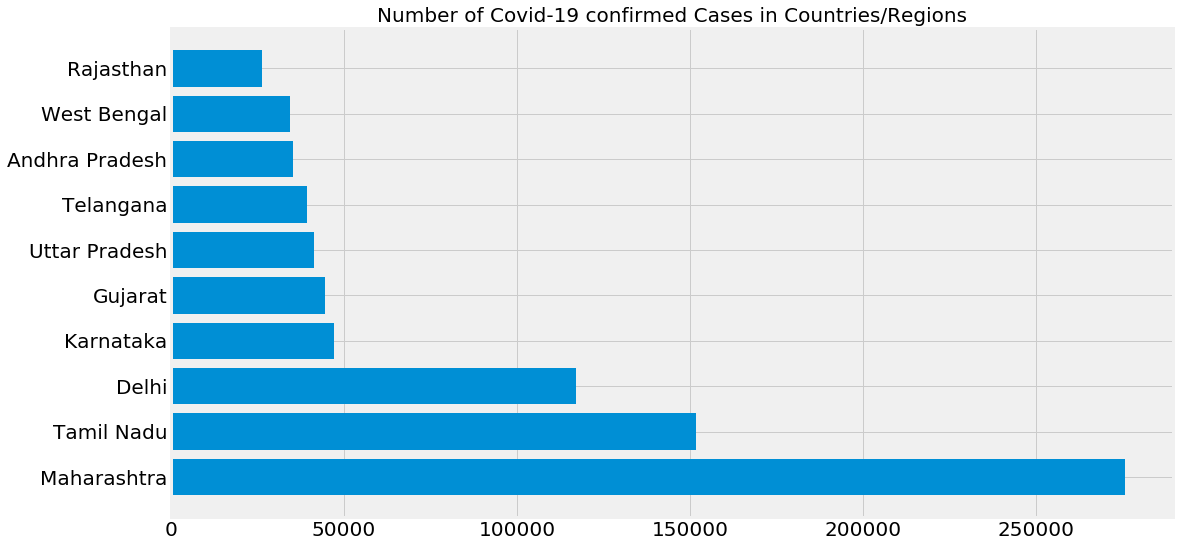

In [250]:
plot_bar_graphs(top_states_india, confirmed_india, 'Number of Covid-19 confirmed Cases in Countries/Regions')

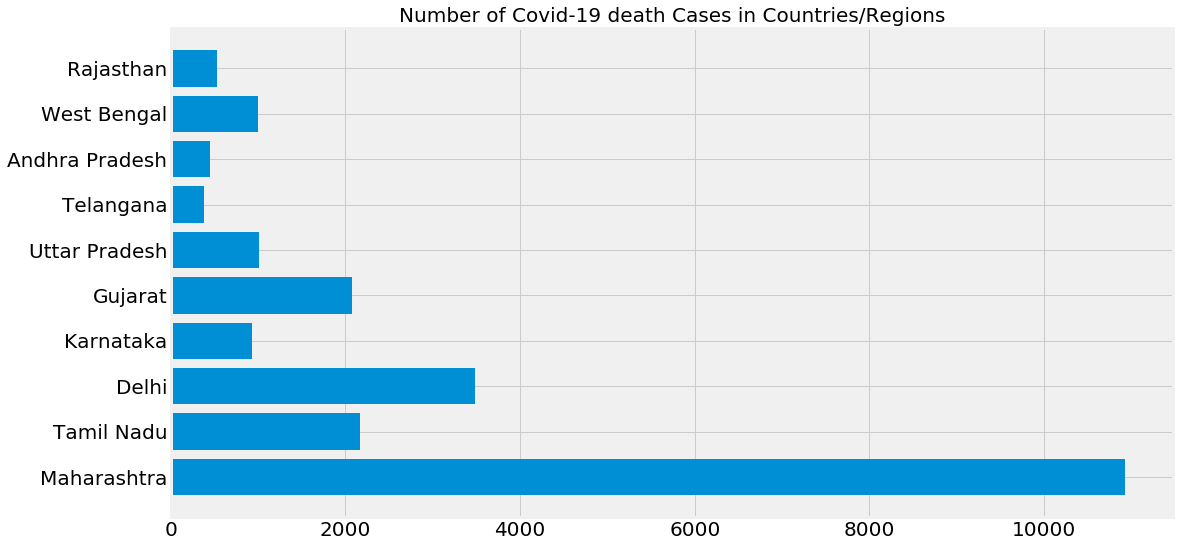

In [252]:
plot_bar_graphs(top_states_india, death_india, 'Number of Covid-19 death Cases in Countries/Regions')

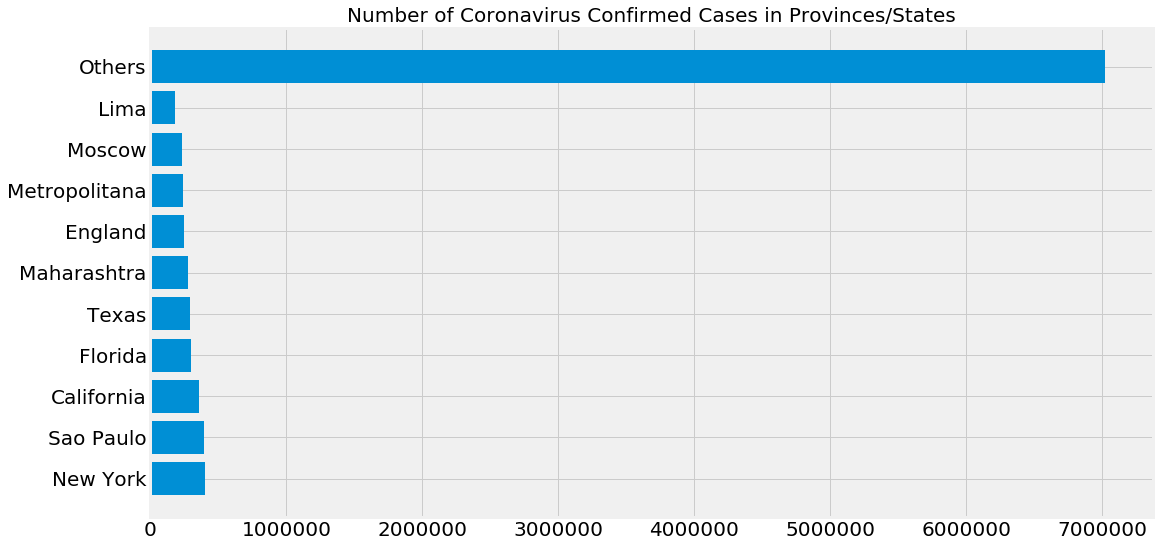

In [103]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, 'Number of Coronavirus Confirmed Cases in Provinces/States')


In [174]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)


In [175]:
days_in_future = 60
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
adjusted_dates = future_forecast[:-60]

In [176]:
len(future_forecast)


248

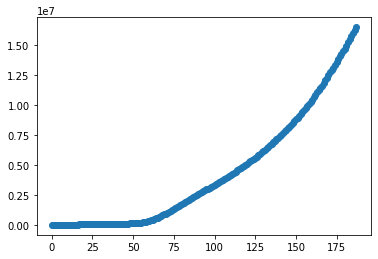

In [76]:
plt.scatter(days_since_1_22,world_cases)

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.25, shuffle=False)


In [106]:
poly = PolynomialFeatures(degree=2)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [107]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
r2_score(y_test_confirmed,test_linear_pred)

0.9291989210714976

In [108]:
poly_entire_data = poly.fit_transform(days_since_1_22)

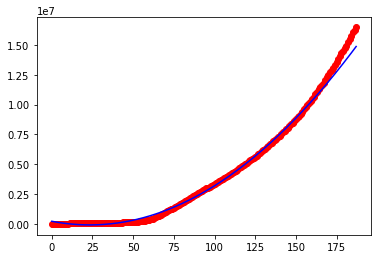

In [113]:
plt.scatter(days_since_1_22,world_cases,color="red")
plt.plot(days_since_1_22,linear_model.predict(poly_entire_data),color = "blue")

In [114]:
linear_pred = linear_model.predict(poly_future_forecast)

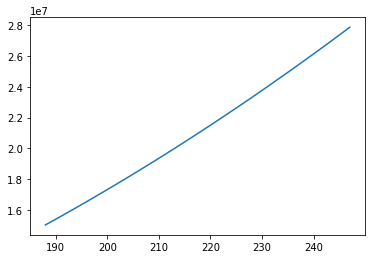

In [115]:
plt.plot(future_forecast[-60:],linear_pred[-60:])

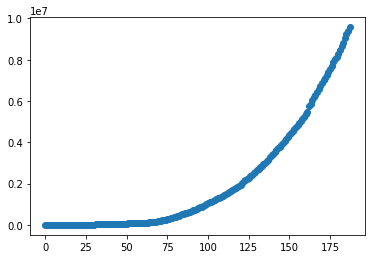

In [123]:
plt.scatter(days_since_1_22,total_recovered)

In [116]:
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(days_since_1_22, total_recovered, test_size=0.25, shuffle=False)


In [148]:
poly = PolynomialFeatures(degree=3)
poly_X_train_recovered = poly.fit_transform(X_train_recovered)
poly_X_test_recovered = poly.fit_transform(X_test_recovered)
poly_future_recovered = poly.fit_transform(future_forecast)

In [150]:
linear_model_re = LinearRegression(normalize=True, fit_intercept=False)
linear_model_re.fit(poly_X_train_recovered, y_train_recovered)
test_linear_pred_re = linear_model_re.predict(poly_X_test_recovered)
r2_score(y_test_recovered,test_linear_pred_re)

0.9967631438969522

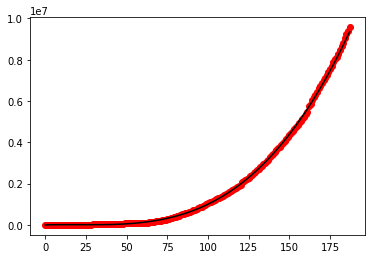

In [151]:
poly_entire_data = poly.fit_transform(days_since_1_22)
plt.scatter(days_since_1_22,total_recovered,color = "red")
plt.plot(days_since_1_22,linear_model_re.predict(poly_entire_data),color = "black")

In [153]:
linear_pred_re = linear_model_re.predict(poly_future_recovered)

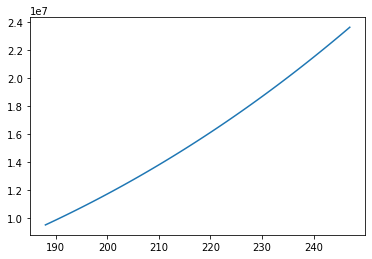

In [154]:
plt.plot(future_forecast[-60:],linear_pred_re[-60:])

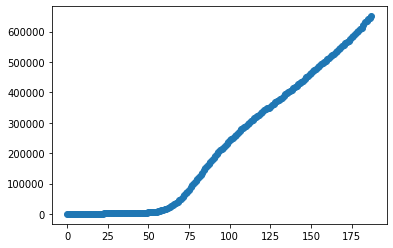

In [162]:
plt.scatter(days_since_1_22,total_deaths)

In [163]:
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(days_since_1_22, total_deaths, test_size=0.25, shuffle=False)


In [164]:
poly = PolynomialFeatures(degree=3)
poly_X_train_deaths = poly.fit_transform(X_train_deaths)
poly_X_test_deaths = poly.fit_transform(X_test_deaths)
poly_future_deaths = poly.fit_transform(future_forecast)

In [165]:
linear_model_dea = LinearRegression(normalize=True, fit_intercept=False)
linear_model_dea.fit(poly_X_train_deaths, y_train_deaths)
test_linear_pred_dea = linear_model_dea.predict(poly_X_test_deaths)
r2_score(y_test_deaths,test_linear_pred_dea)

0.7132128558286013

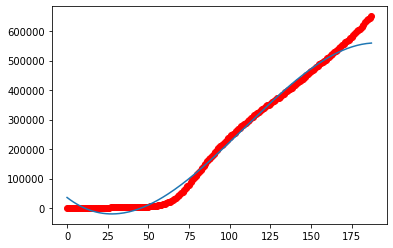

In [169]:
poly_entire_data = poly.fit_transform(days_since_1_22)
plt.scatter(days_since_1_22,total_deaths,color = "red")
plt.plot(days_since_1_22,linear_model_dea.predict(poly_entire_data))

In [170]:
linear_model_dea

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [171]:
linear_pred_dea = linear_model_dea.predict(poly_future_deaths)

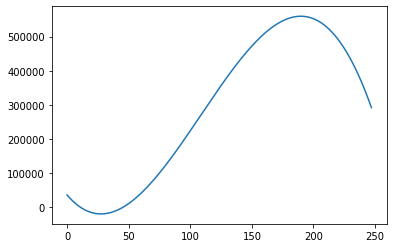

In [172]:
plt.plot(future_forecast,linear_pred_dea)

In [177]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))


In [178]:
future = pd.DataFrame({'Date': future_forecast_dates[-60:], 'Number of Confirmed Cases': np.round(linear_pred[-60:].reshape(60)),
                          'Number of Deaths':np.round(linear_pred_dea[-60:].reshape(60)), 'Number of Recoveries' : np.round(linear_pred_re[-60:].reshape(60))
                          })


In [179]:
future

,Date,Number of Confirmed Cases,Number of Deaths,Number of Recoveries
0,07/28/2020,15049944.0,559597.0,9524907.0
1,07/29/2020,15234545.0,559757.0,9697181.0
2,07/30/2020,15420264.0,559785.0,9871518.0
3,07/31/2020,15607101.0,559682.0,10047930.0
4,08/01/2020,15795055.0,559444.0,10226430.0
5,08/02/2020,15984127.0,559070.0,10407028.0
6,08/03/2020,16174316.0,558558.0,10589738.0
7,08/04/2020,16365623.0,557908.0,10774572.0
8,08/05/2020,16558047.0,557116.0,10961542.0
9,08/06/2020,16751590.0,556182.0,11150661.0


In [208]:
deaths_reported_india = deaths_reported[deaths_reported["Country/Region"]=="India"]

In [209]:
deaths_reported_india = deaths_reported_india.loc[:,cols[4]:cols[-37]]

In [210]:
india_d = deaths_reported_india.values

In [211]:
recovered_cases_india = recovered_cases[recovered_cases["Country/Region"]=="India"].loc[:,cols[4]:cols[-37]]

In [220]:
india_r = recovered_cases_india.values
india_r

array([[     0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      3,      3,      3,      3,      3,      3,      3,
             3,      3,      3,      3,      3,      3,      3,      3,
             3,      3,      3,      3,      3,      3,      3,      3,
             4,      4,      4,      4,      4,     13,     13,     14,
            14,     15,     20,     23,     27,     27,     40,     43,
            45,     73,     84,     95,    102,    123,    148,    191,
           192,    229,    229,    375,    421,    506,    620,    774,
           969,   1080,   1181,   1359,   1432,   1768,   2041,   2463,
          2854,   3273,   3975,   4370,   5012,   5498,   5939,   6523,
          7137,   7747,   8437,   9068,  10007,  10819,  11775,  12847,
         14142,  15331,  16776,  17887,  19301,  20969,  22549, 

In [186]:
confirmed_cases_india = confirmed_cases[confirmed_cases["Country/Region"]=="India"].loc[:,cols[4]:cols[-37]]

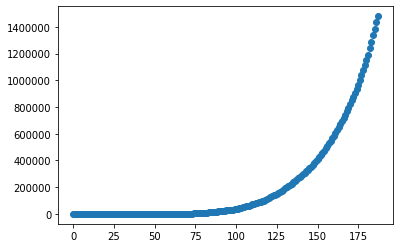

In [190]:
plt.scatter(days_since_1_22,confirmed_cases_india)

In [204]:
india_c = confirmed_cases_india.values
india_c = india_c.reshape(india_c.shape[1])

In [196]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22,india_c, test_size=0.25, shuffle=False)
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [197]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
r2_score(y_test_confirmed,test_linear_pred)

0.9774478452714086

In [200]:
linear_pred = linear_model.predict(poly_future_forecast)

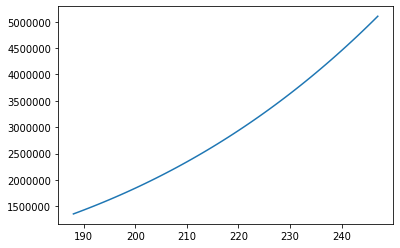

In [201]:
plt.plot(future_forecast[-60:],linear_pred[-60:])
plt.show()

In [215]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(days_since_1_22,india_d.reshape(188), test_size=0.25, shuffle=False)
poly = PolynomialFeatures(degree=4)
poly_X_train_d = poly.fit_transform(X_train_d)
poly_X_test_d = poly.fit_transform(X_test_d)
poly_future_d = poly.fit_transform(future_forecast)

In [216]:
linear_d = LinearRegression(normalize=True, fit_intercept=False)
linear_d.fit(poly_X_train_d, y_train_d)
test_linear_d = linear_d.predict(poly_X_test_d)
r2_score(y_test_d,test_linear_d)

0.9513555789007024

In [243]:
linear_de = linear_d.predict(poly_future_d)
linear_de.shape

(248,)

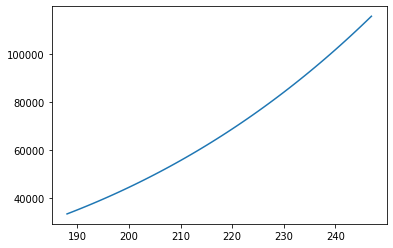

In [244]:
plt.plot(future_forecast[-60:],linear_de[-60:])
plt.show()

In [252]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(days_since_1_22,india_r.reshape(188), test_size=0.1, shuffle=False)
poly = PolynomialFeatures(degree=3)
poly_X_train_r = poly.fit_transform(X_train_r)
poly_X_test_r = poly.fit_transform(X_test_r)
poly_future_r = poly.fit_transform(future_forecast)
len(future_forecast)

248

In [248]:
linear_r = LinearRegression(normalize = True,fit_intercept = False)
linear_r.fit(poly_X_test_r,y_test_r)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [249]:
test_linear_r = linear_r.predict(poly_X_test_r)

In [250]:
r2_score(y_test_r,test_linear_r)

0.9997205618125925

In [259]:

linear_pre_r = linear_r.predict(poly_future_r)


In [260]:
future_indiaa = pd.DataFrame({'Date': future_forecast_dates[-60:], 'Number of Confirmed Cases': np.round(linear_pred[-60:].reshape(60)),
                          'Number of Deaths':np.round(linear_de[-60:].reshape(60)), 'Number of Recoveries' : np.round(linear_pre_r[-60:].reshape(60))
                          })


In [261]:
future_indiaa

,Date,Number of Confirmed Cases,Number of Deaths,Number of Recoveries
0,07/28/2020,1354893.0,33299.0,996497.0
1,07/29/2020,1391426.0,34134.0,1039862.0
2,07/30/2020,1428690.0,34985.0,1085839.0
3,07/31/2020,1466694.0,35852.0,1134558.0
4,08/01/2020,1505450.0,36734.0,1186148.0
5,08/02/2020,1544967.0,37633.0,1240739.0
6,08/03/2020,1585254.0,38547.0,1298458.0
7,08/04/2020,1626321.0,39478.0,1359437.0
8,08/05/2020,1668179.0,40426.0,1423803.0
9,08/06/2020,1710837.0,41391.0,1491686.0
